In [1]:
import os
import numpy as np
from astropy import units as u 
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

In [2]:
imagename = '../compareImage/images/J0423-0120_B7.fits'

In [3]:
hdu_list = fits.open(imagename)

In [4]:
hdu_list.info()

Filename: ../compareImage/images/J0423-0120_B7.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU    2940   (960, 960, 1, 1)   float32   


In [5]:
image_data = hdu_list[0].data

In [6]:
print type(image_data)
print image_data.shape

<type 'numpy.ndarray'>
(1, 1, 960, 960)


In [7]:
image_data[0][0].shape

(960, 960)

In [8]:
img = image_data[0][0]

In [9]:
type(img)

numpy.ndarray

INFO: Setting slices=[0, 0] [aplpy.core]


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

INFO: Auto-setting vmin to -1.765e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.883e-04 [aplpy.core]


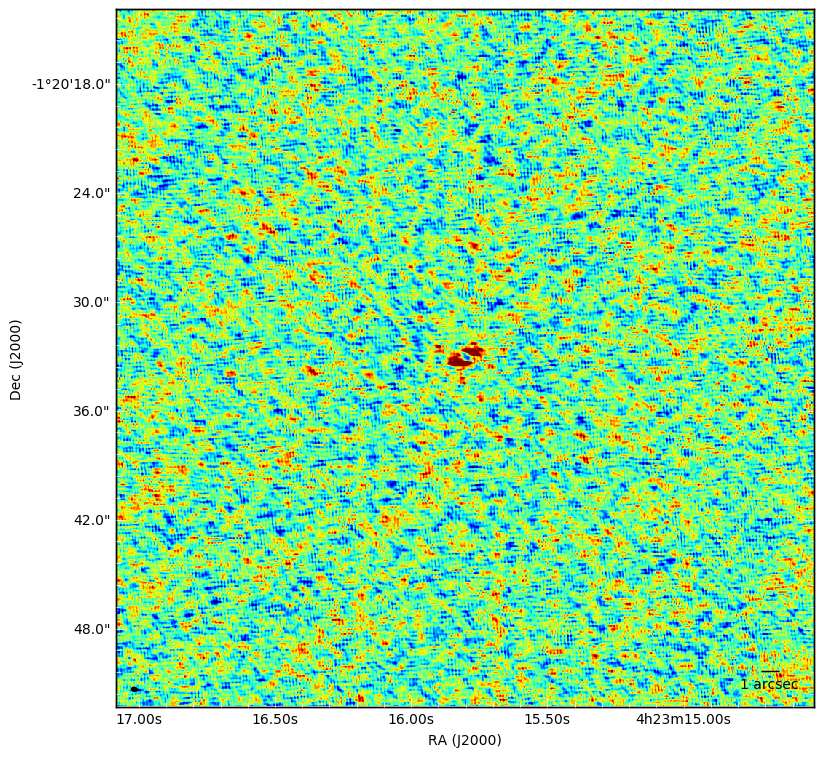

In [10]:
fig = aplpy.FITSFigure(imagename)
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")
fig.show_colorscale()

In [11]:
# NBINS = 1000
# flatimg = img.flatten()
# flatimg = flatimg[~np.isnan(flatimg)] # remove nan
# histogram = plt.hist(flatimg, 1000)

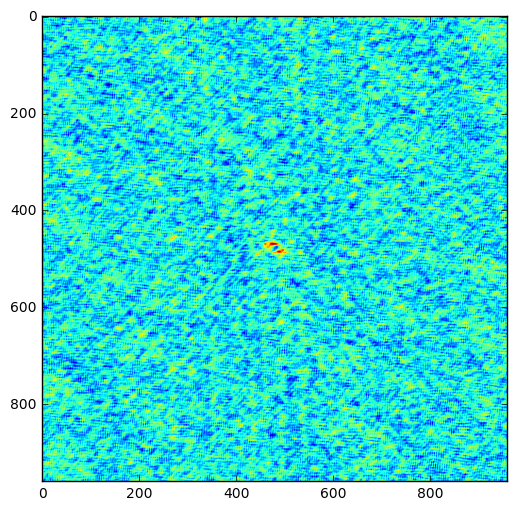

In [12]:
plt.figure(figsize=(6,6))
plt.imshow(img)

In [13]:
from wavelet import wt
wt = wt()

In [14]:
result = wt.atrous(img, 6)

##WT--A Trous--Plane: 6
##WT--A Trous--Plane: 5
##WT--A Trous--Plane: 4
##WT--A Trous--Plane: 3
##WT--A Trous--Plane: 2
##WT--A Trous--Plane: 1
##WT--A Trous--Plane: 0


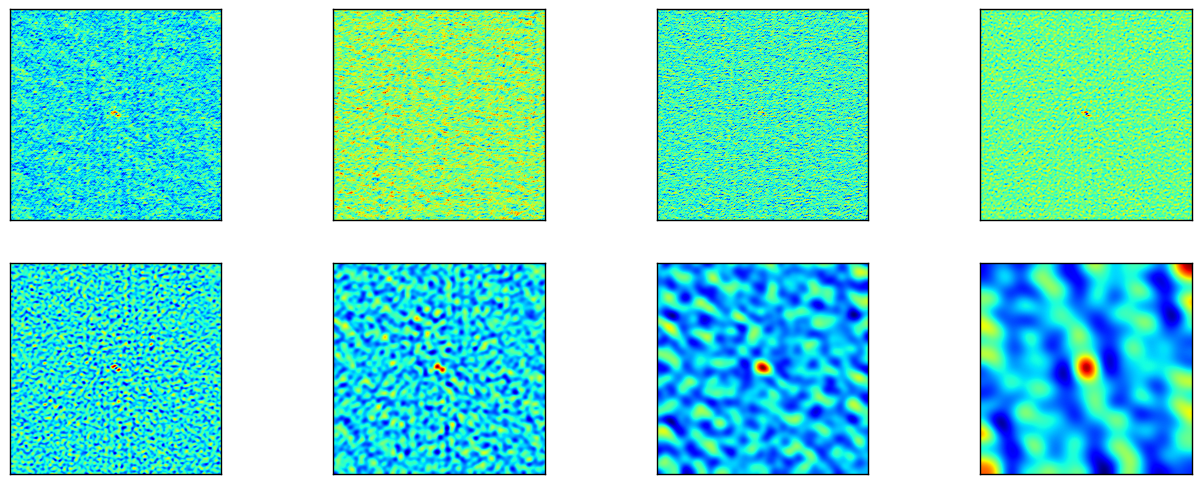

In [15]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(result):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

In [16]:
filteredplane = wt.filtering(result, threshold=3, mask=(50, 350, 50, 350))
#filteredplane = wt.filtering(result, waveletNoise=True, imageNoise = 3*5.3E-05)

#WT-- Image Filtering
#WT-- Filtering to be checked
##WT--Plane 6 Sigma = 1.572832e-05
##WT--Pixel filtered : 919162
##WT--Plane 5 Sigma = 1.804710e-05
##WT--Pixel filtered : 919136
##WT--Plane 4 Sigma = 1.582590e-05
##WT--Pixel filtered : 919043
##WT--Plane 3 Sigma = 1.268790e-05
##WT--Pixel filtered : 918154
##WT--Plane 2 Sigma = 7.322385e-06
##WT--Pixel filtered : 918890
##WT--Plane 1 Sigma = 5.033373e-06
##WT--Pixel filtered : 918904


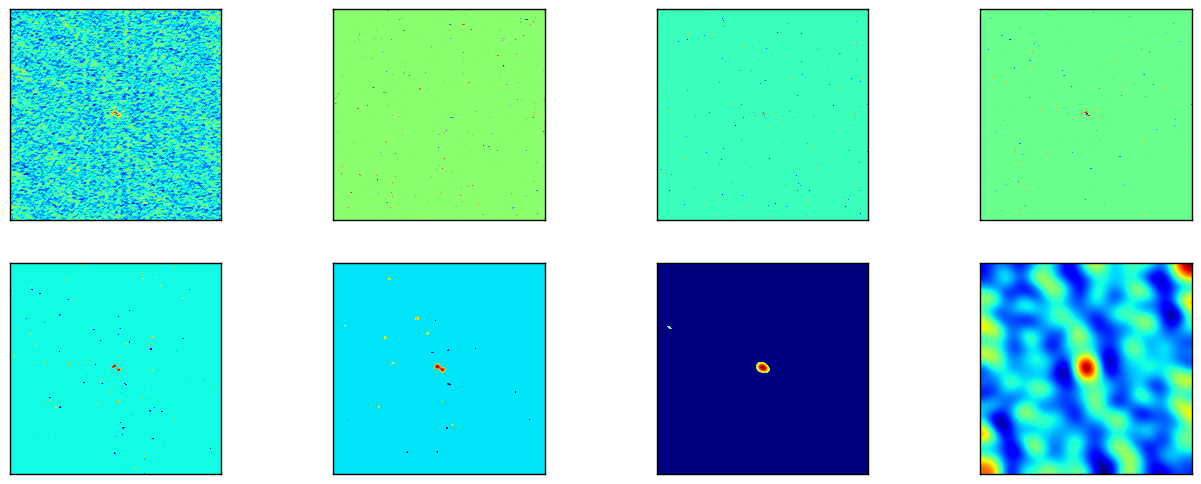

In [17]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(filteredplane):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

In [18]:
filtered = wt.restore(filteredplane, 0, 6)

##WT--Restore-plane: 0 to 6
##WT--Restore-plane: 0
##WT--Restore-plane: 1
##WT--Restore-plane: 2
##WT--Restore-plane: 3
##WT--Restore-plane: 4
##WT--Restore-plane: 5
##WT--Restore-plane: 6


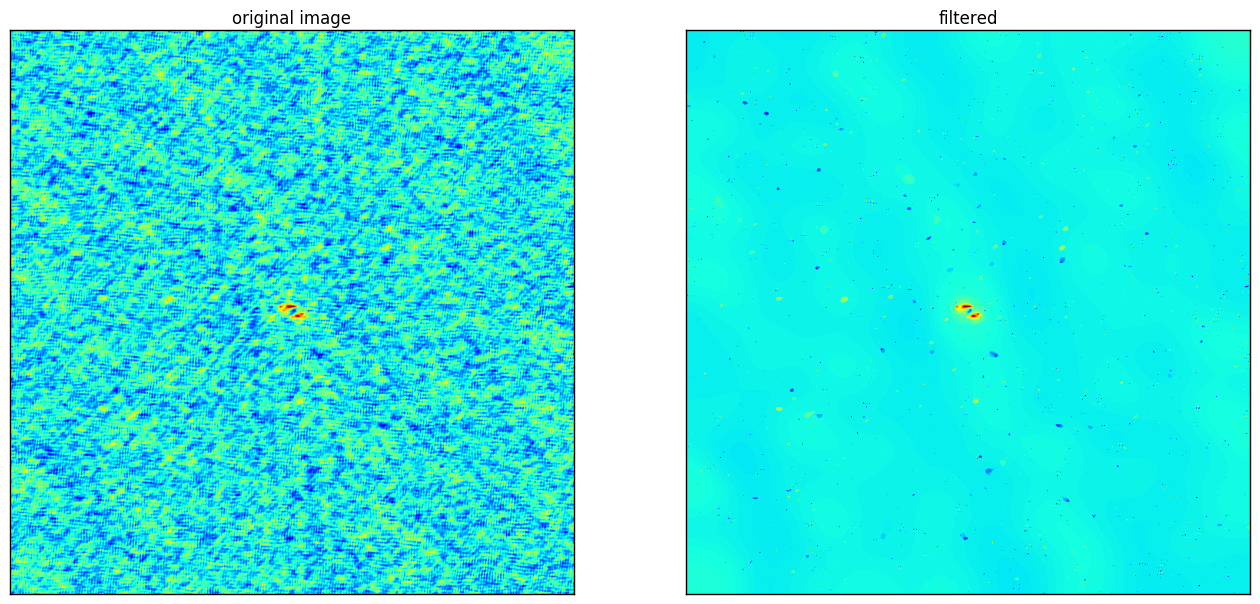

In [19]:
plt.figure(figsize=(16,12))

plt.subplot(121)
plt.imshow(img)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(filtered) ##
plt.title("filtered")
plt.xticks([]), plt.yticks([])

plt.show()

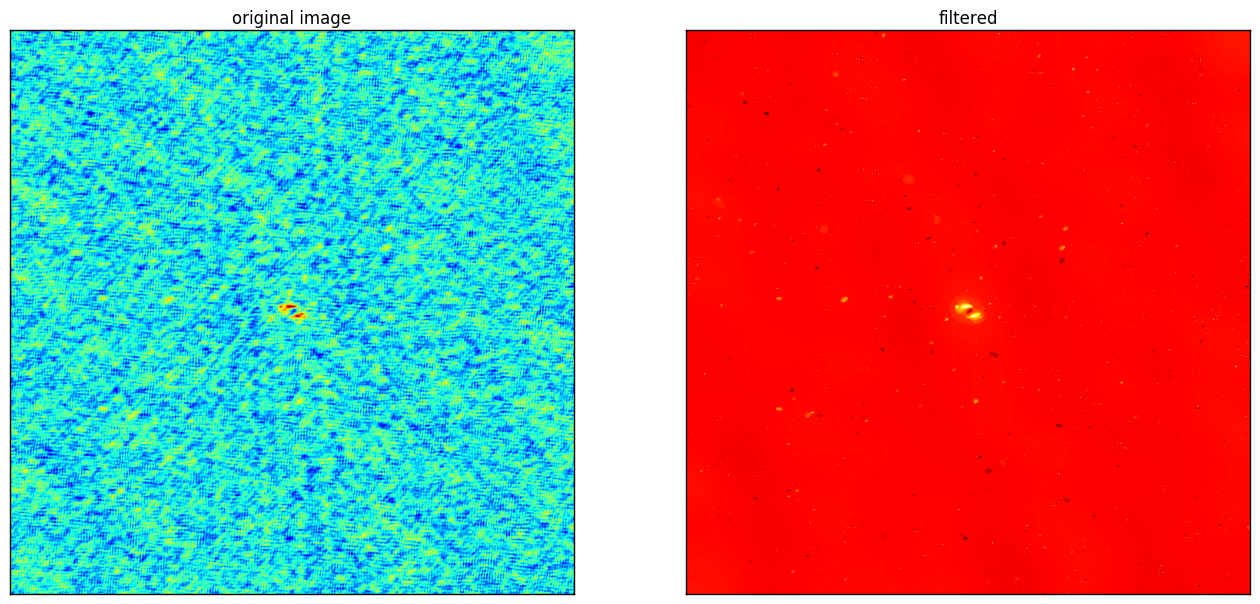

In [20]:
plt.figure(figsize=(16,12))

plt.subplot(121)
plt.imshow(img)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(filtered, cmap='hot')#, cmap='hot') ##
plt.title("filtered")
plt.xticks([]), plt.yticks([])

plt.show()

In [21]:
box = filtered[50:350, 50:350]

In [22]:
np.std(box)

7.4333767153066016e-06

In [23]:
box = img[50:350, 50:350]

In [24]:
np.std(box)

5.3430198e-05

In [25]:
hdu_list[0].data[0][0] = filtered
hdu_list.writeto('J0423-0120_B7_filtered.fits')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -6.122e-05 [aplpy.core]
INFO: Auto-setting vmax to  7.343e-05 [aplpy.core]


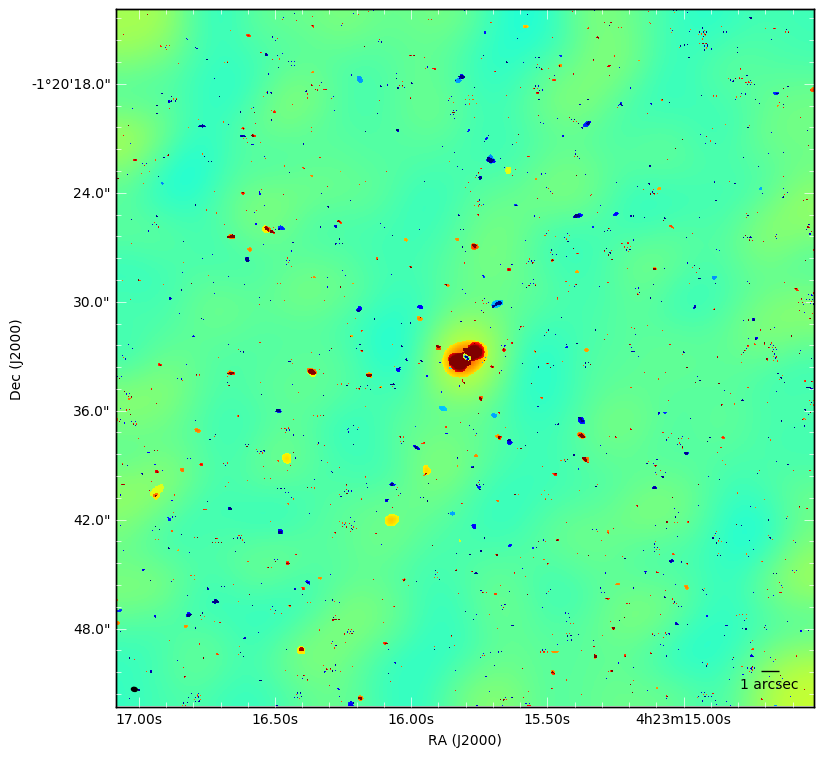

In [26]:
fig = aplpy.FITSFigure('J0423-0120_B7_filtered.fits')
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")
fig.show_colorscale()